In [1]:
!pip install jupyterthemes

In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -monokai

In [4]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [89]:
set_nb_theme('monokai')

In [6]:
print("\n")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import sklearn # I use scikit-learn library to use standard scaling and PCA and to normalize data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

# K Means Clustering
from sklearn.cluster import KMeans

#### Notes

CustomerID: Unique ID assigned to the customer

Gender: Gender of the customer

Age: Age of the customer

Annual Income (k$): Annual income of the customer

Spending Score (1 - 100): Score assigned by the mall based on the customer behavior and spending nature

In [8]:
print("\n")

# Data Overview

In [9]:
mallCustomer = pd.read_csv("Mall_Customers.csv")
mallCustomer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
mallCustomer.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
mallCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
mallCustomer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
mallCustomer.shape

(200, 5)

In [14]:
# from the output above, my hypothesis is 5 variables which influence approximately 200 customers' behaviours

In [15]:
print("\n")

# Data Cleaning

In [16]:
mallCustomer.isnull().sum() # check missing values in mallCustomer dataset

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

since there are no missing values in the dataset, we don't need to do any data cleaning

In [17]:
print("\n")

In [18]:
# since we don't need Customer ID as it doesn't influence customer behavior, I'll drop the Customer ID column from the Mall Customer dataframe
mallCustomer.drop("CustomerID", axis = 1, inplace = True)

In [19]:
mallCustomer.head(10) # check whether the CustomerID column is already dropped or not

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [20]:
# so now, we have four important variables which influence approximately 200 customers' behaviours we need to consider

In [21]:
print("\n")

# Feature Engineering

In [22]:
mallCustomer.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [23]:
print("\n")

We need to categorize Gender (change categorical into numerical data) so that it'll be easier to predict and analyse statistically using KNN and Hierarchical Clustering

In [24]:
print("\n")

Gender Categorization
Male: 0
Female: 1

In [25]:
mallCustomer_data = [mallCustomer]

for customer_dataset in mallCustomer_data:
    customer_dataset["Gender"] = customer_dataset["Gender"].map({"Male": 0, "Female": 1}).astype(int)

In [26]:
mallCustomer.head(10) # check whether gender has been categorized or not

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
5,1,22,17,76
6,1,35,18,6
7,1,23,18,94
8,0,64,19,3
9,1,30,19,72


from the result above, we can see that Gender has been categorized (Male: 0, Female: 1)

I'll also categorize Age, Annual Income, and Spending Score so that it'll be easier later on to be processed statistically using KNN and Hierarchical Clustering

In [27]:
q1 = mallCustomer["Age"].quantile(0.25)
q2 = mallCustomer["Age"].quantile(0.5)
q3 = mallCustomer["Age"].quantile(0.75)
IQR = q3 - q1

In [28]:
q1

28.75

In [29]:
q2

36.0

In [30]:
q3

49.0

In [31]:
IQR

20.25

In [32]:
mallCustomer.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


#### Notes:

Child: 0 (1 - 11 years old)

Teenager: 1 (12 - 21 years old)

Young Adult: 2 (22 - 35 years old)

Middle-Aged Adult: 3 (36 to 60 years)

Senior: 4 (> 60 years)

In [33]:
print("\n")

In [34]:
# to know the min value in each column
minValues = mallCustomer.min()
print(minValues)

Gender                     0
Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64


In [35]:
for customer_dataset in mallCustomer_data:
    # customer_dataset.loc[(customer_dataset["Age"] > 0) & (customer_dataset["Age"] <= 11), "Age"] = 0 # Child
    customer_dataset.loc[(customer_dataset["Age"] >= 18) & (customer_dataset["Age"] <= 21), "Age"] = 0 # Teenager
    customer_dataset.loc[(customer_dataset["Age"] > 21) & (customer_dataset["Age"] <= 35), "Age"] = 1 # Young Adult
    customer_dataset.loc[(customer_dataset["Age"] > 35) & (customer_dataset["Age"] <= 60), "Age"] = 2 # Middle Aged Adult
    customer_dataset.loc[customer_dataset["Age"] > 60, "Age"] = 3 # Senior

In [36]:
mallCustomer.head(10) # to check whether Age has been categorized or not

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,15,39
1,0,0,15,81
2,1,0,16,6
3,1,1,16,77
4,1,1,17,40
5,1,1,17,76
6,1,1,18,6
7,1,1,18,94
8,0,3,19,3
9,1,1,19,72


from the output above, Age has been categorized and converted into a smaller integer

In [37]:
print("\n")

In [38]:
q1_annualIncome = mallCustomer["Annual Income (k$)"].quantile(0.25)
q2_annualIncome = mallCustomer["Annual Income (k$)"].quantile(0.5)
q3_annualIncome = mallCustomer["Annual Income (k$)"].quantile(0.75)
IQR_annualIncome = q3_annualIncome - q1_annualIncome

In [39]:
q1_annualIncome

41.5

In [40]:
q2_annualIncome

61.5

In [41]:
q3_annualIncome

78.0

In [42]:
IQR_annualIncome

36.5

#### Annual Income Categorization

15 <= annualIncome <= 43: Category 0

44 <= annualIncome <= 62: Category 1

63 <= annualIncome <= 91: Category 2

92 <= annualIncome <= 120: Category 3

121 <= annualIncome < 138: Category 4

In [43]:
for customer_dataset in mallCustomer_data:
    customer_dataset.loc[(customer_dataset["Annual Income (k$)"] >= 15) & (customer_dataset["Annual Income (k$)"] <= 43), "Annual Income (k$)"] = 0
    customer_dataset.loc[(customer_dataset["Annual Income (k$)"] >= 44) & (customer_dataset["Annual Income (k$)"] < 63), "Annual Income (k$)"] = 1
    customer_dataset.loc[(customer_dataset["Annual Income (k$)"] >= 63) & (customer_dataset["Annual Income (k$)"] < 92), "Annual Income (k$)"] = 2
    customer_dataset.loc[(customer_dataset["Annual Income (k$)"] >= 92) & (customer_dataset["Annual Income (k$)"] < 121), "Annual Income (k$)"] = 3
    customer_dataset.loc[(customer_dataset["Annual Income (k$)"] >= 121) & (customer_dataset["Annual Income (k$)"] < 138), "Annual Income (k$)"] = 4

In [44]:
mallCustomer.head(50) # to check whether the Annual Income data has been categorized or not

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,0,39
1,0,0,0,81
2,1,0,0,6
3,1,1,0,77
4,1,1,0,40
5,1,1,0,76
6,1,1,0,6
7,1,1,0,94
8,0,3,0,3
9,1,1,0,72


from the result above, we can see that Annual Income has been categorized. It "seems" all 0 since all the values in the mallCustomer.head(50) range from 15 to 43

In [45]:
# to check and ensure further that the Annual Income has been categorized
mallCustomer["Annual Income (k$)"].value_counts()

2    72
0    56
1    50
3    18
4     4
Name: Annual Income (k$), dtype: int64

From the output above, it's proved that Annual Income now has 5 (0 -- 4) categories and category 2 has the biggest data.

In [46]:
print("\n")

#### Categorize Spending Score

since it ranges from 1 to 100 as it's stated in the Dataframe Column, I decide to divide spending score data into four categories:

1 <= Spending Score <= 25: Category 0

26 <= Spending Score <= 50: Category 1

51 <= Spending Score <= 75: Category 2

76 <= Spending Score <= 100: Category 3

In [47]:
for customer_dataset in mallCustomer_data:
    customer_dataset.loc[(customer_dataset["Spending Score (1-100)"] >= 1) & (customer_dataset["Spending Score (1-100)"] <= 25), "Spending Score (1-100)"] = 0
    customer_dataset.loc[(customer_dataset["Spending Score (1-100)"] >= 26) & (customer_dataset["Spending Score (1-100)"] <= 50), "Spending Score (1-100)"] = 1
    customer_dataset.loc[(customer_dataset["Spending Score (1-100)"] >= 51) & (customer_dataset["Spending Score (1-100)"] <= 75), "Spending Score (1-100)"] = 2
    customer_dataset.loc[(customer_dataset["Spending Score (1-100)"] >= 76) & (customer_dataset["Spending Score (1-100)"] <= 100), "Spending Score (1-100)"] = 3

In [48]:
mallCustomer.head(10) # to check whether Spending Score is already categorized or not

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,0,1
1,0,0,0,3
2,1,0,0,0
3,1,1,0,3
4,1,1,0,1
5,1,1,0,3
6,1,1,0,0
7,1,1,0,3
8,0,3,0,0
9,1,1,0,2


from the output above, we can see that the Spending Score has been categorized.

In [49]:
print("\n\n")

### Standardize and Normalize Data

In [50]:
standard_scaling = StandardScaler()
standardized_data = standard_scaling.fit_transform(mallCustomer)

In [51]:
normalized_data = normalize(standardized_data)

In [52]:
print("\n")

### Reduce Data Dimension Using PCA

In [53]:
# I want to reduce data dimension to 2D so it'll be easier to processed statistically later on
TwoDimension = PCA(n_components = 2)
pca = TwoDimension.fit_transform(normalized_data)
pca

array([[ 0.14985776,  0.53817367],
       [-0.03301082,  0.91320461],
       [-0.41271005, -0.01906988],
       [-0.68716145,  0.46897831],
       [-0.61575834, -0.14526805],
       [-0.68716145,  0.46897831],
       [-0.36266129, -0.39755088],
       [-0.68716145,  0.46897831],
       [ 0.60886997, -0.57358783],
       [-0.75287762,  0.22575978],
       [ 0.60886997, -0.57358783],
       [-0.68716145,  0.46897831],
       [-0.18932725, -0.75899277],
       [-0.68716145,  0.46897831],
       [ 0.59404905, -0.38211385],
       [ 0.11356462,  0.78780609],
       [-0.61575834, -0.14526805],
       [ 0.05368099,  0.78748215],
       [ 0.59958647, -0.13898384],
       [-0.68716145,  0.46897831],
       [ 0.39867256,  0.29384302],
       [ 0.26543885,  0.6357408 ],
       [-0.18932725, -0.75899277],
       [ 0.26543885,  0.6357408 ],
       [-0.18932725, -0.75899277],
       [ 0.11356462,  0.78780609],
       [-0.39172286, -0.60819503],
       [ 0.26543885,  0.6357408 ],
       [-0.39172286,

In [54]:
pca = pd.DataFrame(pca, columns = ["Component 1", "Component 2"])
pca.head(10)

,Component 1,Component 2
0,0.149858,0.538174
1,-0.033011,0.913205
2,-0.412710,-0.019070
3,-0.687161,0.468978
4,-0.615758,-0.145268
5,-0.687161,0.468978
6,-0.362661,-0.397551
7,-0.687161,0.468978
8,0.608870,-0.573588
9,-0.752878,0.225760


In [56]:
KMeans_pca = pca.copy()
# KMeans_pca.drop("HC Prediction Score", axis = 1, inplace = True)
KMeans_pca

,Component 1,Component 2
0,0.149858,0.538174
1,-0.033011,0.913205
2,-0.412710,-0.019070
3,-0.687161,0.468978
4,-0.615758,-0.145268
...,...,...
195,-0.385455,0.463499
196,0.047665,-0.324054
197,0.449368,0.454618
198,0.562166,0.015758


In [57]:
print("\n\n")

# Hierarchical Clustering

#### Dendrogram

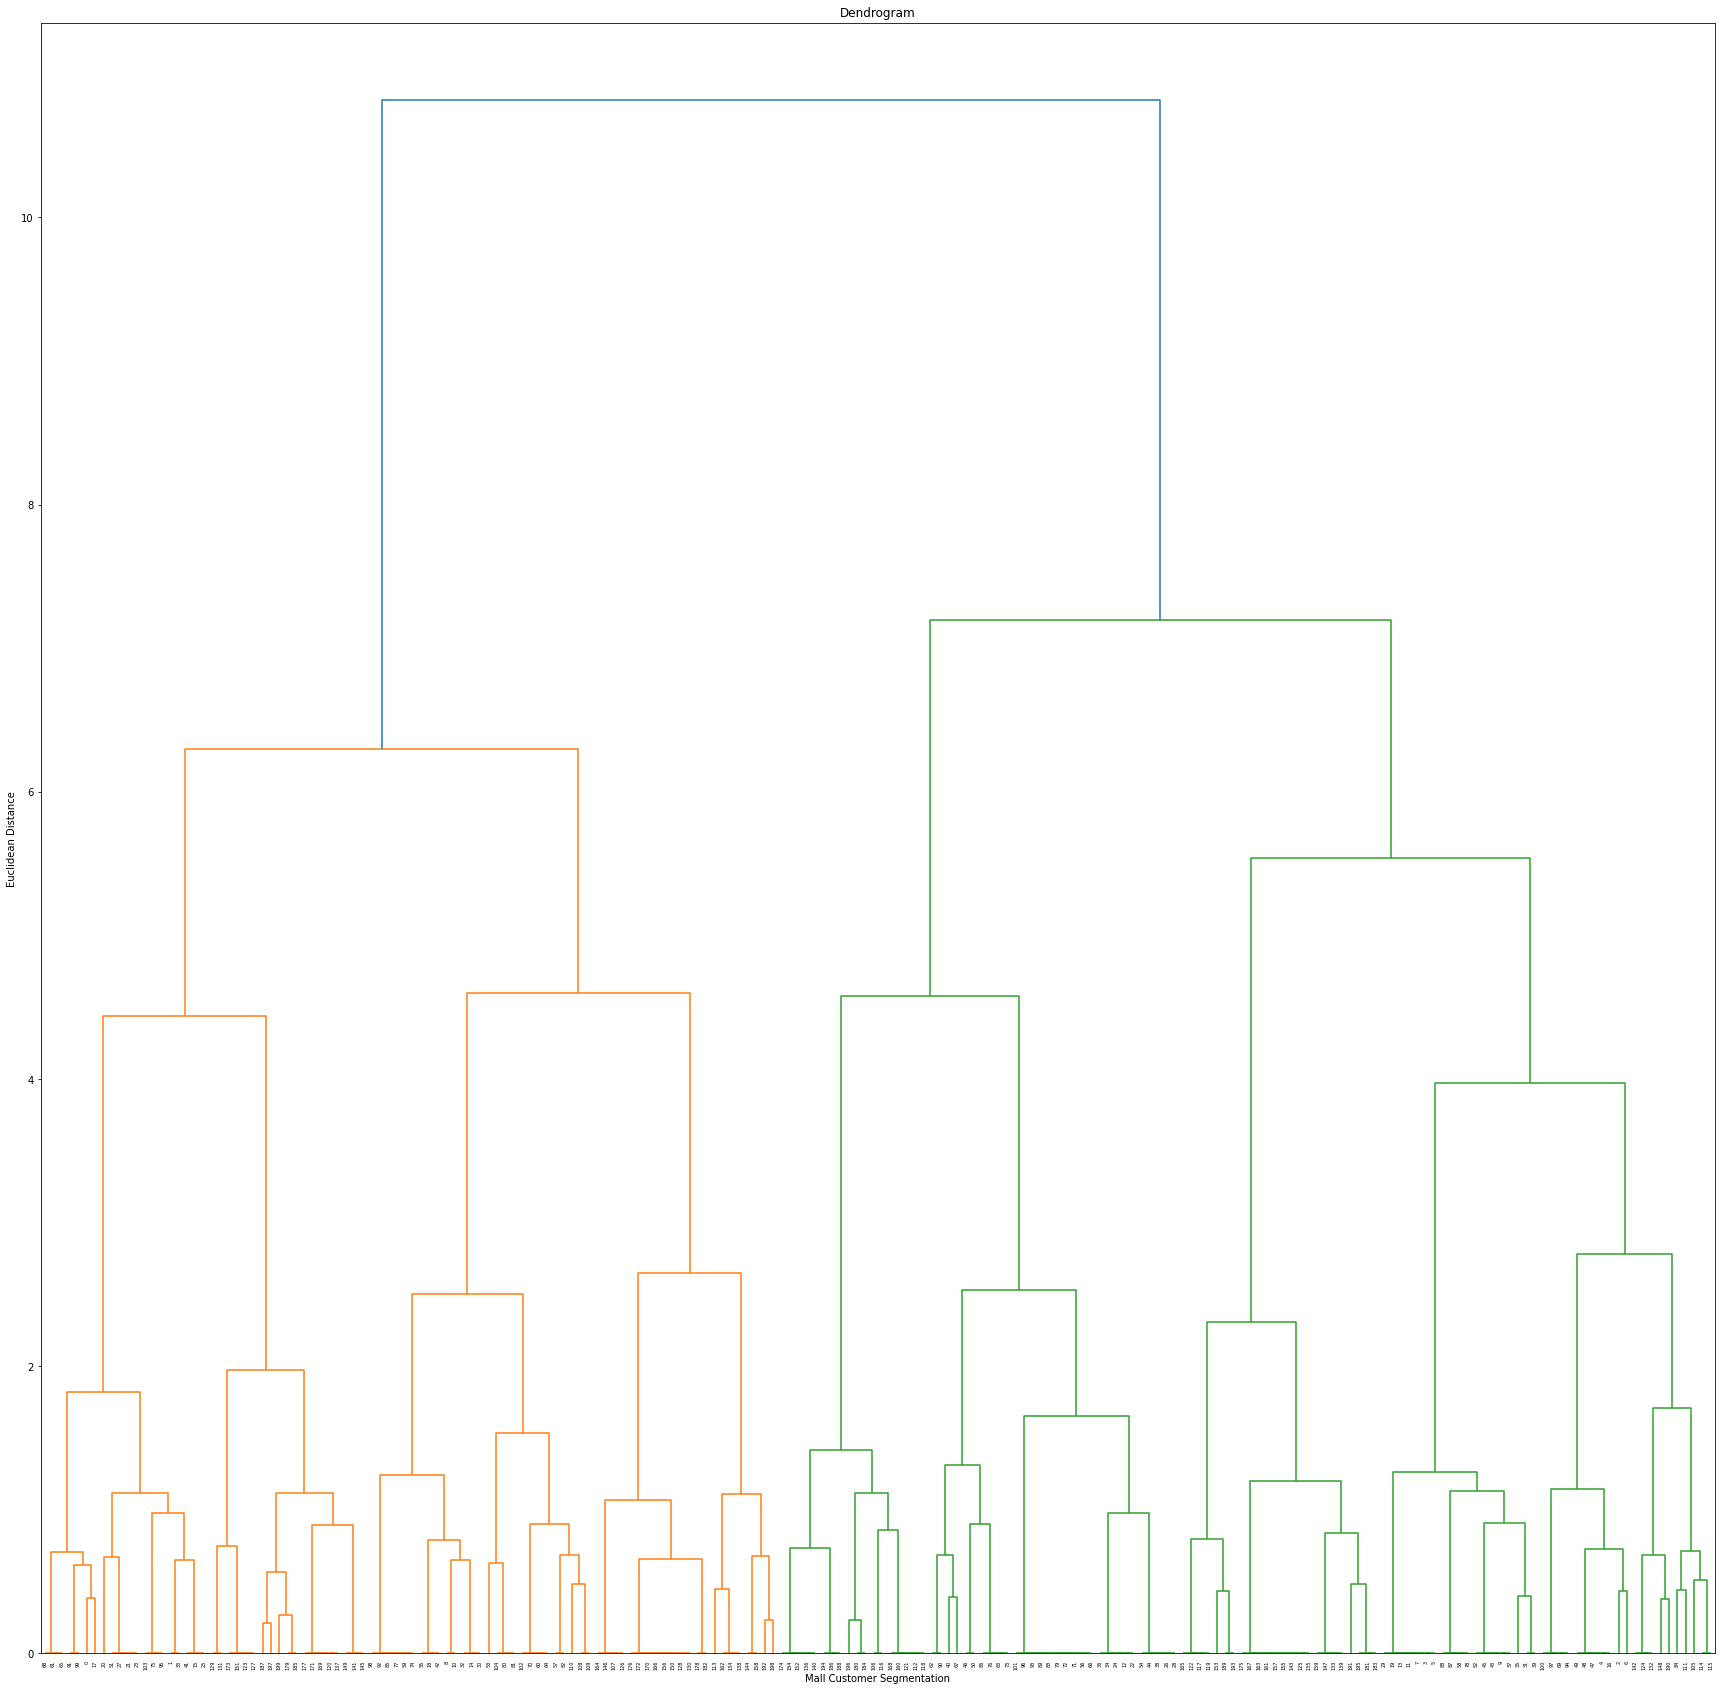

In [58]:
plt.figure(figsize = (30, 30))
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method = "ward", metric = "euclidean"))
plt.title("Dendrogram")
plt.xlabel("Mall Customer Segmentation")
plt.ylabel("Euclidean Distance")
plt.show()

### Interpreting Clusters

#### Agglomerative Clustering

In [59]:
# I want to make 5 clusters of customer since I think it's average. When we use too many clusters, that'll be overcomplicated, while when we use too few clusters, that'll be too common. 
hierarchical_clustering = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", compute_full_tree = "auto", linkage = "ward")
y_predict = hierarchical_clustering.fit_predict(normalized_data)
y_predict

array([1, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 0, 1, 3, 1, 0, 3, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 3, 0, 3, 0, 1, 2, 3, 2, 3, 2, 3, 2, 1, 0, 3,
       2, 3, 2, 3, 3, 3, 2, 1, 3, 0, 2, 0, 2, 0, 3, 0, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 3, 0, 2, 2, 2, 0, 1, 2, 0, 3, 2, 0, 0, 0, 2, 3, 0, 2, 3,
       3, 2, 2, 1, 0, 2, 3, 1, 2, 3, 0, 1, 3, 2, 0, 1, 0, 3, 2, 0, 0, 0,
       0, 3, 2, 0, 3, 3, 2, 4, 2, 4, 1, 2, 4, 1, 3, 4, 0, 1, 0, 1, 0, 1,
       3, 4, 0, 4, 2, 1, 0, 4, 2, 1, 3, 4, 0, 1, 0, 4, 3, 1, 0, 1, 2, 4,
       2, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 2, 1, 0, 1, 0, 1, 2, 4,
       0, 1, 0, 1, 2, 4, 0, 4, 2, 1, 2, 1, 2, 4, 3, 4, 0, 4, 2, 4, 2, 1,
       0, 1], dtype=int64)

In [60]:
pca["HC Prediction Score"] = y_predict

In [61]:
hc_dataframe = pd.concat([mallCustomer, pd.DataFrame({"HC Clusters": hierarchical_clustering.labels_})], axis = 1)

In [62]:
hc_dataframe # Prediction score (the Hierarchical Clustering result performed by Agglomerative Clustering) is in a new dataframe which I name as hc_dataframe variable so that later on we can draw scatterplot from the prediction score

,Gender,Age,Annual Income (k$),Spending Score (1-100),HC Clusters
0,0,0,0,1,1
1,0,0,0,3,1
2,1,0,0,0,3
3,1,1,0,3,3
4,1,1,0,1,3
...,...,...,...,...,...
195,1,1,3,3,4
196,1,2,4,1,2
197,0,1,4,2,1
198,0,1,4,0,0


from the dataframe output above, we can see that label of customer clusters given by Hierarchical Clustering through Agglomerative Clustering has been added to the dataframe so that we can visualize the HC Clusters column with Facet Grid.

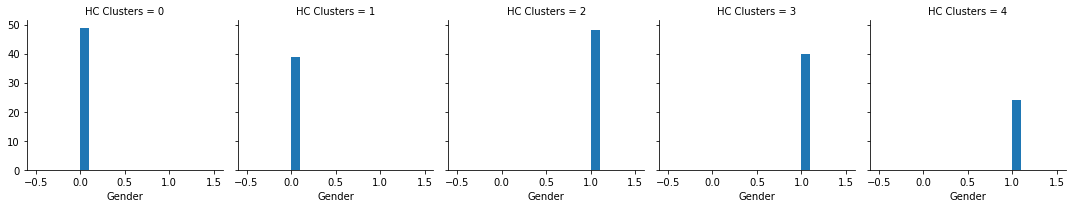

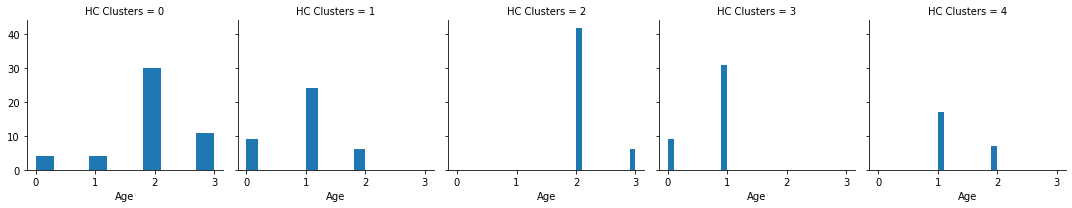

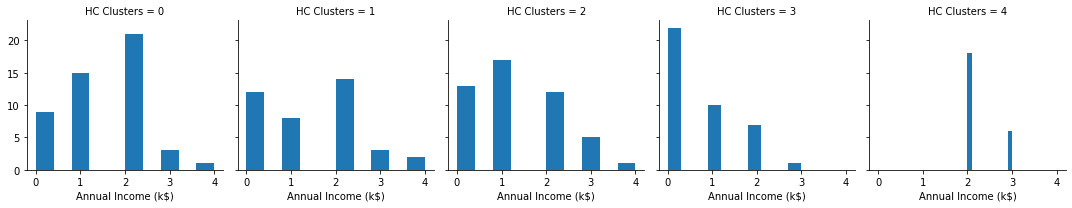

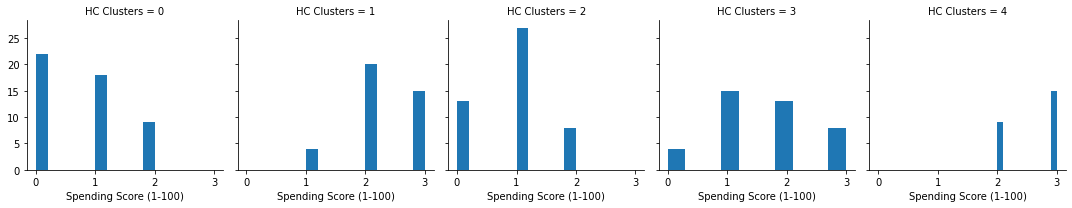

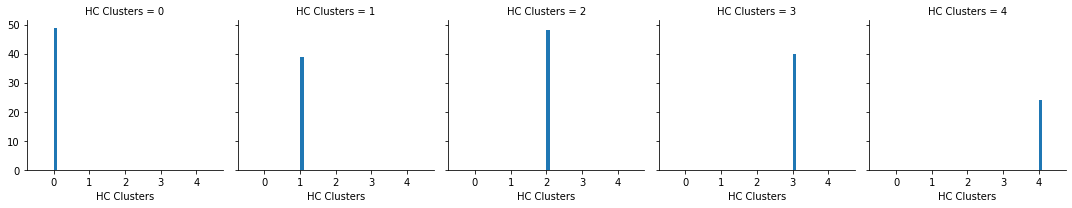

In [63]:
for index in hc_dataframe:
    grid = sb.FacetGrid(hc_dataframe, col = "HC Clusters")
    grid.map(plt.hist, index)

In [64]:
mallCustomer.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,0,1
1,0,0,0,3
2,1,0,0,0
3,1,1,0,3
4,1,1,0,1
5,1,1,0,3
6,1,1,0,0
7,1,1,0,3
8,0,3,0,0
9,1,1,0,2


In [65]:
mallCustomer.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,0,1
1,0,0,0,3
2,1,0,0,0
3,1,1,0,3
4,1,1,0,1
5,1,1,0,3
6,1,1,0,0
7,1,1,0,3
8,0,3,0,0
9,1,1,0,2


In [67]:
# mallCustomer.drop("HC Prediction Score", axis = 1, inplace = True)

In [68]:
mallCustomer.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,0,1
1,0,0,0,3
2,1,0,0,0
3,1,1,0,3
4,1,1,0,1
5,1,1,0,3
6,1,1,0,0
7,1,1,0,3
8,0,3,0,0
9,1,1,0,2


In [69]:
pca.head(10)

,Component 1,Component 2,HC Prediction Score
0,0.149858,0.538174,1
1,-0.033011,0.913205,1
2,-0.412710,-0.019070,3
3,-0.687161,0.468978,3
4,-0.615758,-0.145268,3
5,-0.687161,0.468978,3
6,-0.362661,-0.397551,3
7,-0.687161,0.468978,3
8,0.608870,-0.573588,0
9,-0.752878,0.225760,3


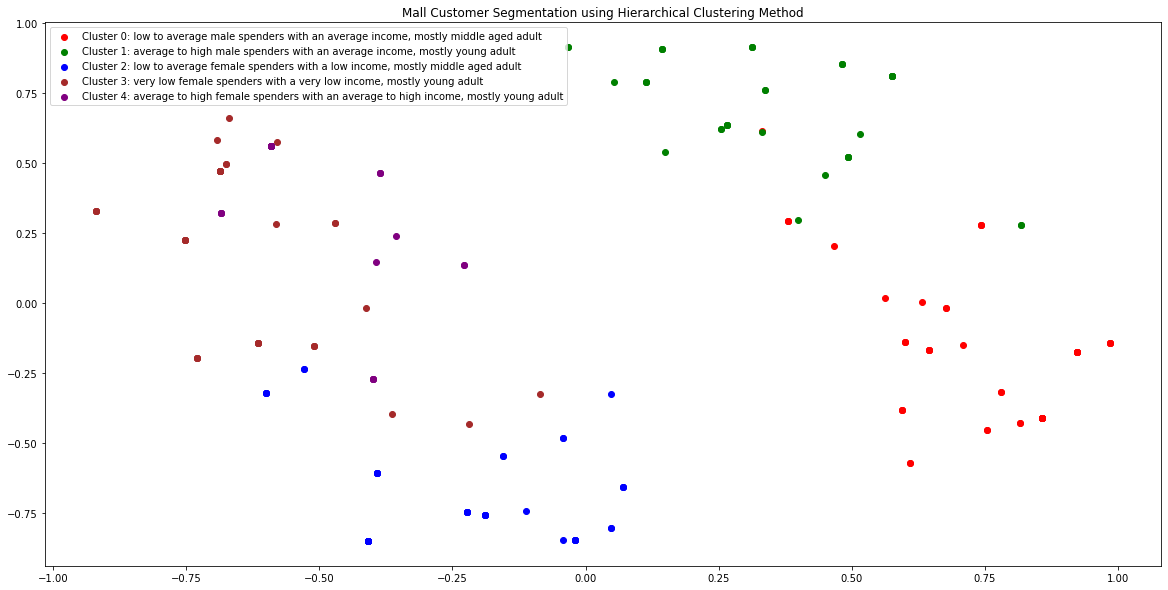

In [83]:
# Mall Customer Segmentation using Hierarchical Clustering Visualization with Scatterplot

plt.figure(figsize = (20, 10))
plt.scatter(pca.loc[pca["HC Prediction Score"] == 0, "Component 1"], pca.loc[pca["HC Prediction Score"] == 0, "Component 2"], c = "r", label = "Cluster 0: low to average male spenders with an average income, mostly middle aged adult")
plt.scatter(pca.loc[pca["HC Prediction Score"] == 1, "Component 1"], pca.loc[pca["HC Prediction Score"] == 1, "Component 2"], c = "g", label = "Cluster 1: average to high male spenders with an average income, mostly young adult")
plt.scatter(pca.loc[pca["HC Prediction Score"] == 2, "Component 1"], pca.loc[pca["HC Prediction Score"] == 2, "Component 2"], c = "b", label = "Cluster 2: low to average female spenders with a low income, mostly middle aged adult")
plt.scatter(pca.loc[pca["HC Prediction Score"] == 3, "Component 1"], pca.loc[pca["HC Prediction Score"] == 3, "Component 2"], c = "brown", label = "Cluster 3: very low female spenders with a very low income, mostly young adult")
plt.scatter(pca.loc[pca["HC Prediction Score"] == 4, "Component 1"], pca.loc[pca["HC Prediction Score"] == 4, "Component 2"], c = "purple", label = "Cluster 4: average to high female spenders with an average to high income, mostly young adult")
plt.title("Mall Customer Segmentation using Hierarchical Clustering Method")
plt.legend()
plt.show()


In [71]:
print("\n\n")

# K-Means Clustering

There are actually two ways to determine the optimal number of clusters in K Means Clustering: Elbow Point Method and Silhouette Score. I choose Elbow Point method instead of Silhouette Score since I think it's easier to implement in coding. 

In Elbow Point Method, we choose x as the optimal number of cluster if after x in Elbow Curve, the drops are minimal.

C:\Users\Belinda Gan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WCSS')

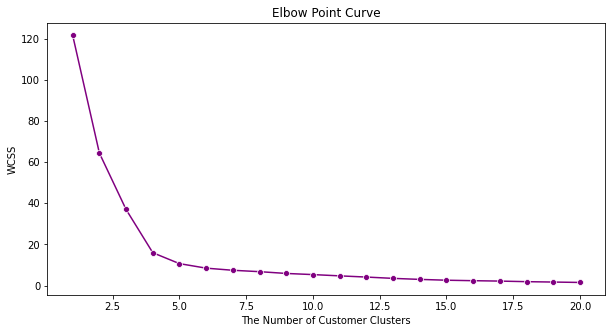

In [72]:
wcss = []

for index in range(1, 21):
    kmeans = KMeans(index) # per index
    kmeans.fit(KMeans_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 5))
sb.lineplot(range(1, 21), wcss, marker = "o", color = "purple")
plt.title("Elbow Point Curve")
plt.xlabel("The Number of Customer Clusters")
plt.ylabel("WCSS")

from the Elbow Point Curve above, since drops after x = 5 is minimal, I choose 5 as the optimal number of clusters.

In [73]:
kmeans_score = KMeans(n_clusters = 5)
y_predict_KMeans = kmeans_score.fit_predict(KMeans_pca)
y_predict_KMeans

array([1, 1, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3, 0, 3, 2, 1, 4, 1, 2, 3, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 3, 2, 3, 2, 1, 0, 3, 0, 3, 0, 3, 0, 1, 2, 3,
       0, 3, 4, 4, 4, 4, 4, 1, 3, 1, 0, 2, 0, 2, 3, 2, 2, 1, 0, 4, 2, 1,
       0, 0, 1, 4, 2, 0, 0, 4, 2, 1, 4, 2, 3, 0, 2, 2, 2, 0, 3, 2, 4, 3,
       3, 0, 0, 1, 2, 0, 4, 1, 0, 4, 2, 1, 4, 0, 2, 1, 2, 3, 0, 2, 2, 2,
       2, 3, 0, 1, 3, 3, 0, 4, 0, 4, 1, 0, 4, 1, 4, 3, 2, 1, 2, 2, 2, 2,
       4, 3, 1, 3, 0, 1, 1, 3, 0, 1, 4, 3, 2, 1, 2, 3, 0, 1, 2, 1, 0, 4,
       0, 3, 2, 3, 2, 3, 0, 3, 1, 3, 2, 4, 2, 3, 0, 1, 2, 1, 2, 1, 0, 3,
       2, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 1, 0, 4, 0, 3, 2, 4, 0, 3, 0, 1,
       2, 1])

In [74]:
KMeans_pca["KMeans Clusters"] = y_predict_KMeans

In [75]:
KMeans_pca.head(10)

,Component 1,Component 2,KMeans Clusters
0,0.149858,0.538174,1
1,-0.033011,0.913205,1
2,-0.412710,-0.019070,4
3,-0.687161,0.468978,3
4,-0.615758,-0.145268,4
5,-0.687161,0.468978,3
6,-0.362661,-0.397551,4
7,-0.687161,0.468978,3
8,0.608870,-0.573588,2
9,-0.752878,0.225760,3


from the dataframe result above, we can see that the mall customer segmentation by K Means Clustering method has been added as a new column of the dataframe so that we can use the column to visualize the segmentation with scatterplot

In [76]:
KMeansDataFrame = pd.concat([mallCustomer, pd.DataFrame({"K Means Clusters": kmeans_score.labels_})], axis = 1)
KMeansDataFrame.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),K Means Clusters
0,0,0,0,1,1
1,0,0,0,3,1
2,1,0,0,0,4
3,1,1,0,3,3
4,1,1,0,1,4
5,1,1,0,3,3
6,1,1,0,0,4
7,1,1,0,3,3
8,0,3,0,0,2
9,1,1,0,2,3


from the dataframe result above, labels given by K Means Clustering Method has been combined with mallCustomer dataframe, which I name as a new variable: KMeansDataFrame so that we can use the labels in K Means Clusters column to be visualized with Facet Grid, which will help us to determine characteristics of each customer cluster

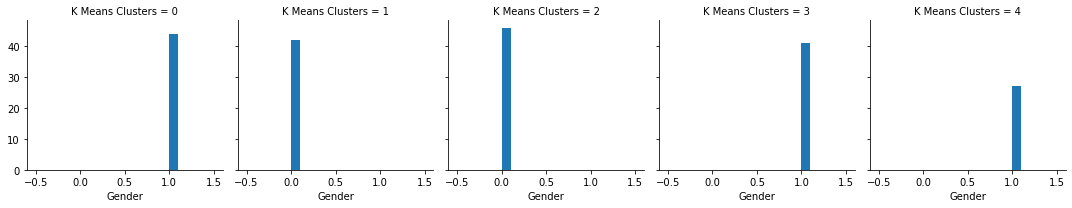

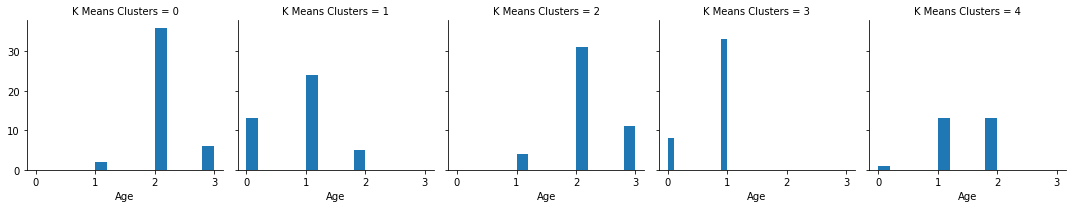

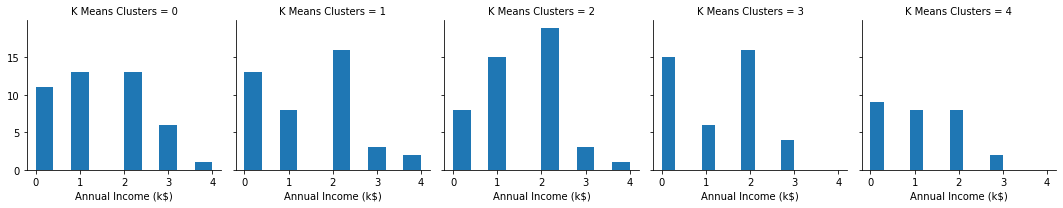

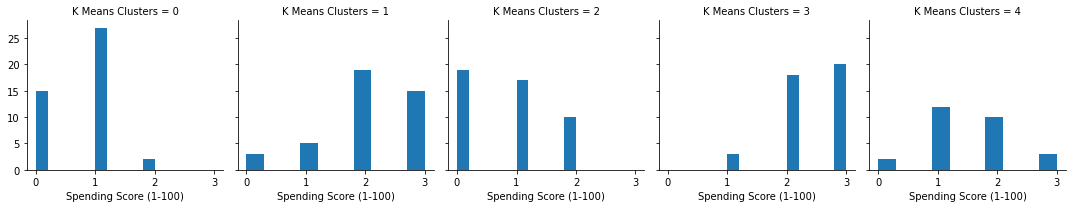

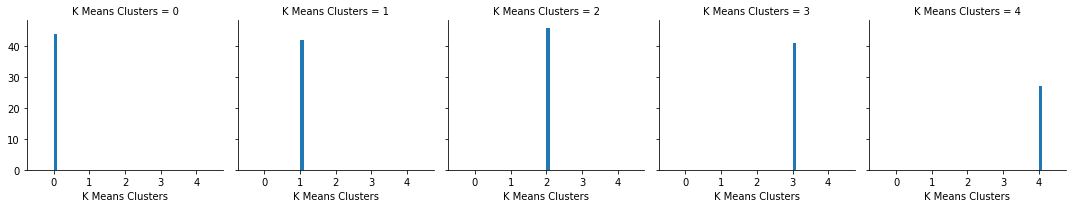

In [78]:
for index in KMeansDataFrame:
    grid = sb.FacetGrid(KMeansDataFrame, col = "K Means Clusters")
    grid.map(plt.hist, index)

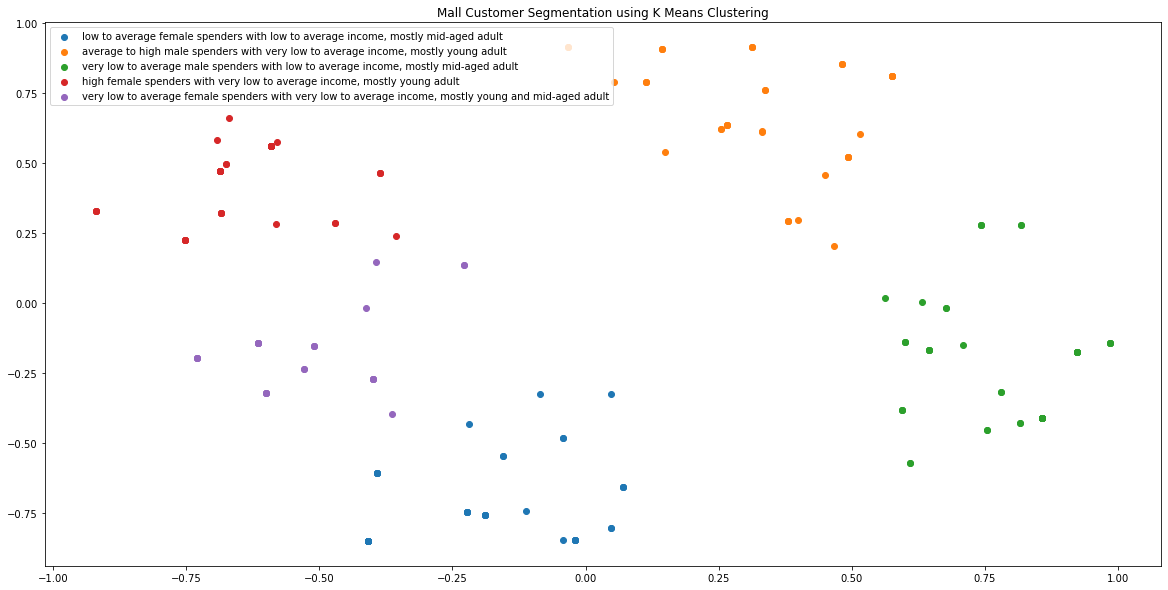

In [85]:
# Mall Customer Segmentation using K Means Clustering Visualization with Scatterplot

plt.figure(figsize = (20, 10))
plt.scatter(KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 0, "Component 1"], KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 0, "Component 2"], label = "low to average female spenders with low to average income, mostly mid-aged adult")
plt.scatter(KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 1, "Component 1"], KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 1, "Component 2"], label = "average to high male spenders with very low to average income, mostly young adult")
plt.scatter(KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 2, "Component 1"], KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 2, "Component 2"], label = "very low to average male spenders with low to average income, mostly mid-aged adult")
plt.scatter(KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 3, "Component 1"], KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 3, "Component 2"], label = "high female spenders with very low to average income, mostly young adult")
plt.scatter(KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 4, "Component 1"], KMeans_pca.loc[KMeans_pca["KMeans Clusters"] == 4, "Component 2"], label = "very low to average female spenders with very low to average income, mostly young and mid-aged adult")
plt.title("Mall Customer Segmentation using K Means Clustering")
plt.legend()
plt.show()

In [86]:
print("\n\n")

In [87]:
mallCustomer.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,0,1
1,0,0,0,3
2,1,0,0,0
3,1,1,0,3
4,1,1,0,1
5,1,1,0,3
6,1,1,0,0
7,1,1,0,3
8,0,3,0,0
9,1,1,0,2


In [88]:
print("\n\n")

# Conclusion

##### In Hierarchical Clustering, I choose 5 as the optimal number of clusters since I see it as not a big, also not a small number since when number of clusters is too few, the characteristic of each cluster will be too common and when the number of clusters are too big, processing cluster will be more complicated.

In [92]:
print("\n")

#### Based on Hierarchical Clustering result which is performed through Agglomerative Clustering and Facet Grid visualization to determine characteristics of each mall customer cluster:

a. Mall Customer Cluster 0: low to average male spenders with an average annual income, mostly middle aged adult 

b. Mall Customer Cluster 1: average to high male spenders with an average annual income, mostly young adult 

c. Mall Customer Cluster 2: low to average female spenders with a low annual income, mostly middle aged adult 

d. Mall Customer Cluster 3: very low female spenders with a very low annual income, mostly young adult 

e. Mall Customer Cluster 4: average to high female spenders with an average to high annual income, mostly young adult 

In [90]:
print("\n")

##### In K-Means Clustering, I choose 5 as the optimal number of clusters since drops after x = 5.0 in Elbow Curve is minimal. 

a. Mall Customer Cluster 0: female customers with low to average annual income and spending score, mostly middle aged adult 

b. Mall Customer Cluster 1: male customers with low to average annual income and average to high spending score, mostly young adult 

c. Mall Customer Cluster 2: male customers with very low to average annual income and low to average spending score, mostly middle aged adult 

d. Mall Customer Cluster 3: female customers with very low to average annual income and high spending score, mostly young adult 

e. Mall Customer Cluster 4: low to average male spenders with low to average annual income and spending score, mostly young and middle aged adult 

In [91]:
print("\n\n")